In [112]:
import pandas as pd
import matplotlib as plt
import numpy as np
import plotly.express as px

0 secs - video data starts
34 secs - sensor data starts
46 secs - attention intervals start

In [45]:
sensor_data = pd.read_csv("data/sensor.csv", delimiter=";")
attention_interval = pd.read_csv("data/attention_intervals.csv")
attention = pd.read_csv("data/attention.csv")

In [46]:
#add timing indicator
sensor_data.insert(0, "index", range(0,len(sensor_data)))
sensor_data["seconds"] = sensor_data["index"] * 15 + 34

In [57]:
attention_interval += 46

In [58]:
attention["overall"] = attention["luuk"] + attention["jan"] + attention["carlos"] + attention["mayank"]

In [59]:
attention["seconds"] = attention["seconds"].astype("int")

In [60]:
new = pd.merge(attention, sensor_data, on="seconds", how="left")

In [61]:
luuk = attention_interval.iloc[:,:1]
jan = attention_interval.iloc[:,1:2]
mayank = attention_interval.iloc[:,2:3]
carlos = attention_interval.iloc[:,3:4]

In [62]:
luuk.dropna(inplace=True)
jan.dropna(inplace=True)
carlos.dropna(inplace=True)

In [63]:
luuk["luuk_indicator"] = 1
jan["jan_indicator"] = 1
mayank["mayank_indicator"] = 1
carlos["carlos_indicator"] = 1

<ipython-input-63-e102e0fcff8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayank["mayank_indicator"] = 1


In [64]:
luuk.rename(columns={"Luuk": "seconds"}, inplace=True)
jan.rename(columns={"Jan": "seconds"}, inplace=True)
mayank.rename(columns={"Mayank": "seconds"}, inplace=True)
carlos.rename(columns={"Carlos": "seconds"}, inplace=True)

C:\Users\carlo\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [65]:
luuk["seconds"] = luuk["seconds"].astype("int")
jan["seconds"] = jan["seconds"].astype("int")
mayank["seconds"] = mayank["seconds"].astype("int")
carlos["seconds"] = carlos["seconds"].astype("int")

<ipython-input-65-3996b109a067>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayank["seconds"] = mayank["seconds"].astype("int")


In [66]:
new = pd.merge(new, luuk, on="seconds", how="left")
new = pd.merge(new, jan, on="seconds", how="left")
new = pd.merge(new, mayank, on="seconds", how="left")
new = pd.merge(new, carlos, on="seconds", how="left")

In [67]:
new["luuk_indicator"] = new["luuk_indicator"].fillna(0)
new["jan_indicator"] = new["jan_indicator"].fillna(0)
new["mayank_indicator"] = new["mayank_indicator"].fillna(0)
new["carlos_indicator"] = new["carlos_indicator"].fillna(0)

<AxesSubplot:xlabel='seconds'>

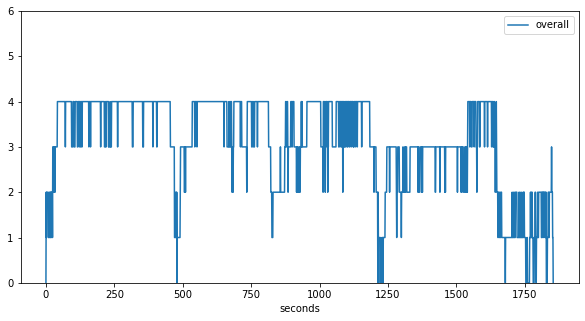

In [68]:
new.plot(x="seconds",y="overall", ylim=(0,6), figsize=(10,5))

<AxesSubplot:xlabel='seconds'>

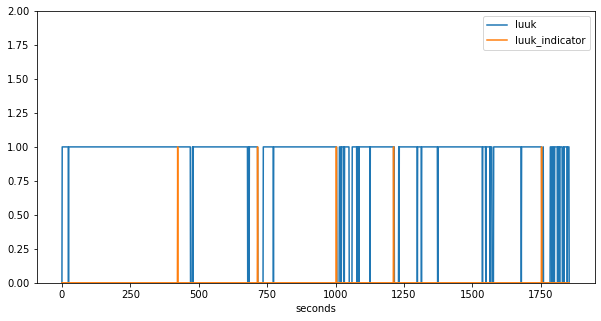

In [69]:
new.plot(x="seconds",y=["luuk", "luuk_indicator"], ylim=(0,2), figsize=(10,5))

<AxesSubplot:xlabel='seconds'>

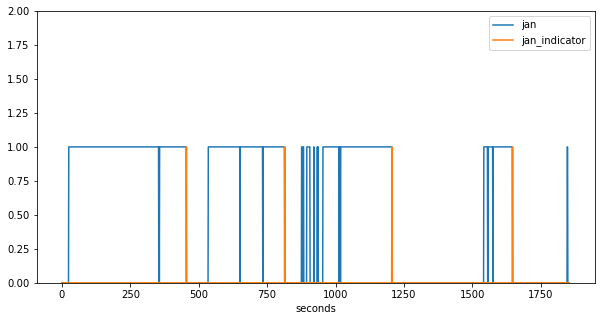

In [70]:
new.plot(x="seconds",y=["jan", "jan_indicator"],kind="line", ylim=(0,2), figsize=(10,5))

<AxesSubplot:xlabel='seconds'>

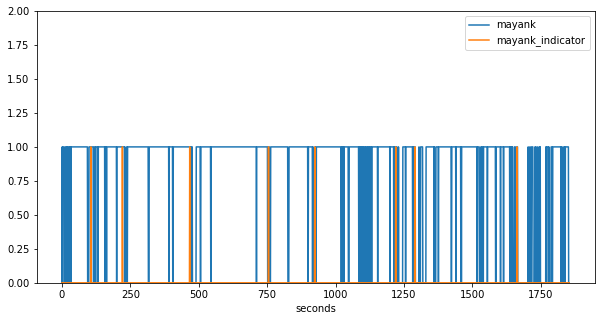

In [71]:
new.plot(x="seconds",y=["mayank", "mayank_indicator"],kind="line", ylim=(0,2), figsize=(10,5))

<AxesSubplot:xlabel='seconds'>

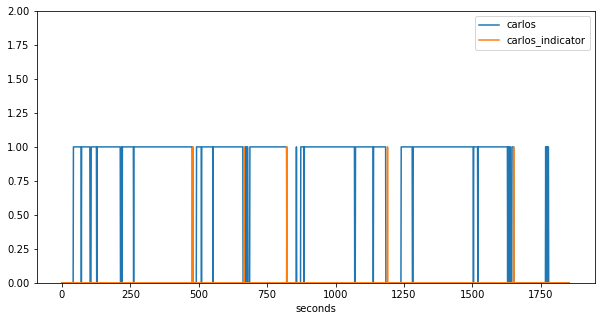

In [72]:
new.plot(x="seconds",y=["carlos", "carlos_indicator"],kind="line", ylim=(0,2), figsize=(10,5))

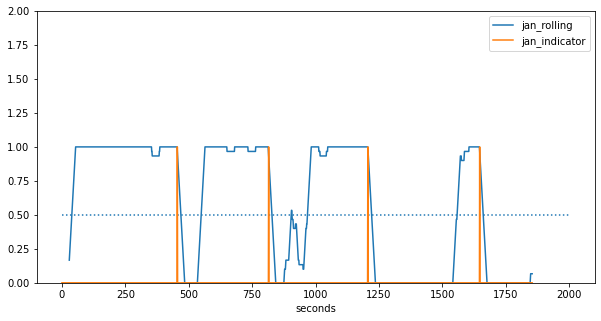

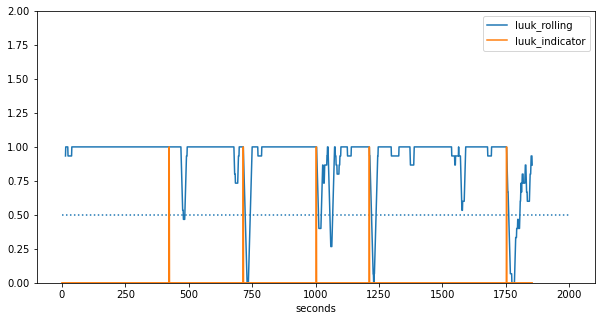

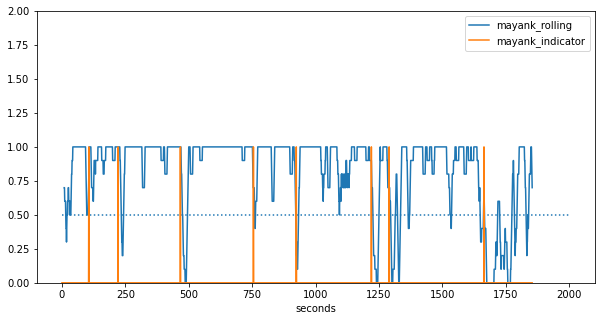

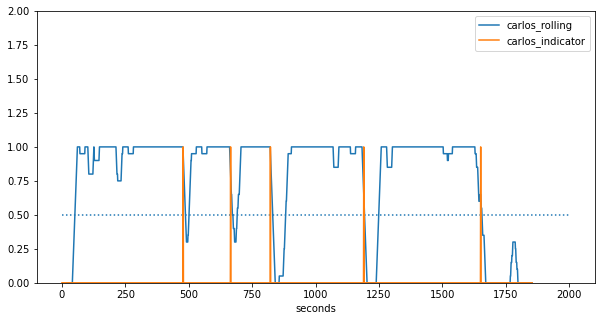

In [73]:
rolling = 10 
new["jan_rolling"] = new["jan"].rolling(30).mean()
new["luuk_rolling"] = new["luuk"].rolling(15).mean()
new["mayank_rolling"] = new["mayank"].rolling(10).mean()
new["carlos_rolling"] = new["carlos"].rolling(20).mean()
new.plot(x="seconds",y=["jan_rolling", "jan_indicator"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")
new.plot(x="seconds",y=["luuk_rolling", "luuk_indicator"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")
new.plot(x="seconds",y=["mayank_rolling", "mayank_indicator"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")
new.plot(x="seconds",y=["carlos_rolling", "carlos_indicator"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")

In [74]:
new["luuk_attention_break"] = new["luuk_rolling"] <= 0.5
new["jan_attention_break"] = new["jan_rolling"] <= 0.5
new["mayank_attention_break"] = new["mayank_rolling"] <= 0.5
new["carlos_attention_break"] = new["carlos_rolling"] <= 0.5

In [75]:
new["carlos_attention_break"] = new["carlos_attention_break"].astype(int)

In [76]:
new["carlos_attention_break_rolling"] = new["carlos_attention_break"].rolling(120, min_periods=1).max()
new["jan_attention_break_rolling"] = new["jan_attention_break"].rolling(120, min_periods=1).max()
new["mayank_attention_break_rolling"] = new["mayank_attention_break"].rolling(120, min_periods=1).max()
new["luuk_attention_break_rolling"] = new["luuk_attention_break"].rolling(120, min_periods=1).max()

In [77]:
new["attention_break_rolling_sum"] = new["carlos_attention_break_rolling"] + new["jan_attention_break_rolling"] + new["mayank_attention_break_rolling"] +new["luuk_attention_break_rolling"]

In [78]:
new["minute"] = new["seconds"] / 60
new["minute"] = new["minute"].apply(np.floor)

<AxesSubplot:xlabel='seconds'>

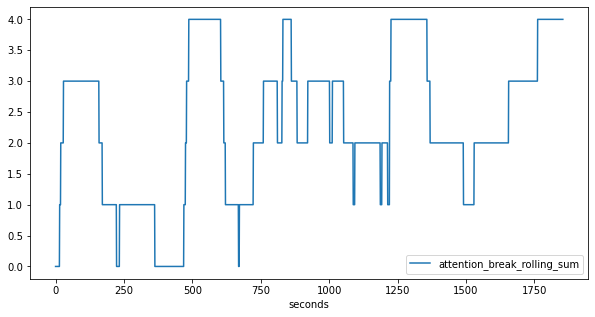

In [79]:
new.plot(x="seconds",y=["attention_break_rolling_sum"],kind="line", figsize=(10,5))

In [80]:
aggregate= new[["minute", "jan_attention_break", "luuk_attention_break", "mayank_attention_break", "carlos_attention_break"]]

In [81]:
aggregate["jan_attention_break"] = aggregate["jan_attention_break"].astype(int)
aggregate["luuk_attention_break"] = aggregate["luuk_attention_break"].astype(int)
aggregate["carlos_attention_break"] = aggregate["carlos_attention_break"].astype(int)
aggregate["mayank_attention_break"] = aggregate["mayank_attention_break"].astype(int)

<ipython-input-81-8904a6c7ec41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregate["jan_attention_break"] = aggregate["jan_attention_break"].astype(int)
<ipython-input-81-8904a6c7ec41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregate["luuk_attention_break"] = aggregate["luuk_attention_break"].astype(int)
<ipython-input-81-8904a6c7ec41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [82]:
test = aggregate.groupby("minute").max()

In [83]:
test["sum"] = test["jan_attention_break"] + test["carlos_attention_break"] + test["luuk_attention_break"] + test["mayank_attention_break"]

In [84]:
test

,jan_attention_break,luuk_attention_break,mayank_attention_break,carlos_attention_break,sum
minute,,,,,
0.0,1,0,1,1,3
1.0,0,0,1,0,1
2.0,0,0,0,0,0
3.0,0,0,1,0,1
4.0,0,0,1,0,1
5.0,0,0,0,0,0
6.0,0,0,0,0,0
7.0,1,1,1,0,3
8.0,1,1,1,1,4


<AxesSubplot:xlabel='minute'>

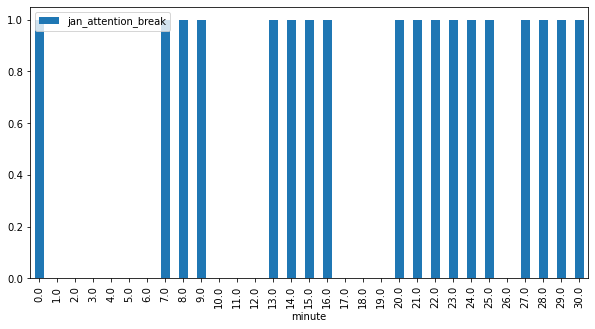

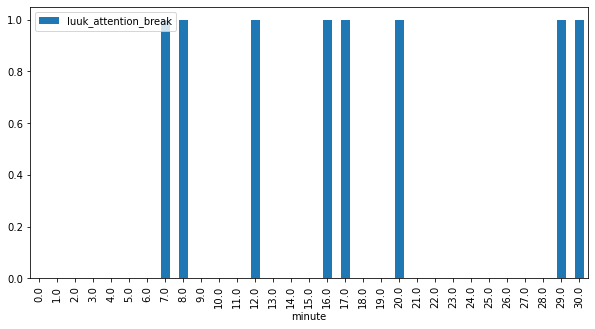

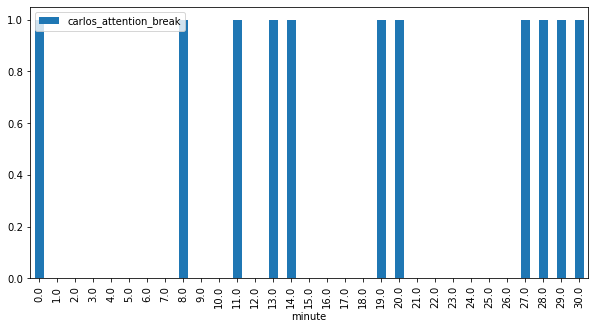

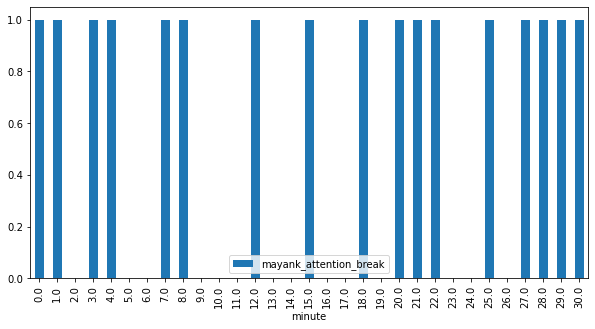

In [32]:
test.plot(y="jan_attention_break", figsize=(10,5), kind="bar")
test.plot(y="luuk_attention_break", figsize=(10,5),  kind="bar")
test.plot(y="carlos_attention_break", figsize=(10,5),  kind="bar")
test.plot(y="mayank_attention_break", figsize=(10,5), kind="bar")

In [33]:
test["rolling"] = test["sum"].rolling(4, min_periods=1).mean()

In [34]:
test["rolling2"] = test["rolling"].rolling(4, min_periods=1).mean()

<AxesSubplot:xlabel='minute'>

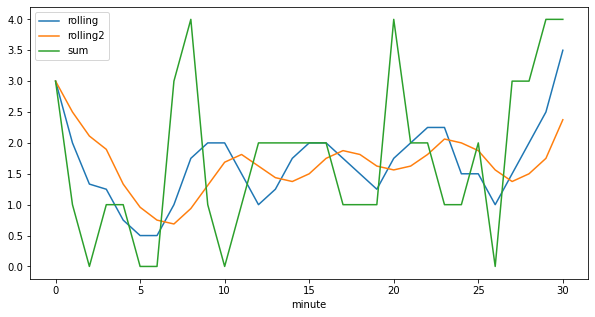

In [35]:
test.plot(y=["rolling","rolling2", "sum"], figsize=(10,5))

In [ ]:
## Machine learning ##

In [47]:
# date time and make data numeric
sensor_data["Date and time"] = pd.to_datetime(sensor_data["Date and time"], format="%d-%m-%Y %H:%M:%S")
sensor_data.set_index("Date and time", inplace=True)
sensor_data.iloc[:, 1:] = sensor_data.iloc[:, 1:].astype(str)
sensor_data.iloc[:, 1:] = sensor_data.iloc[:, 1:].apply(lambda x: x.str.replace(",", "."))
sensor_data.iloc[:, 1:] = sensor_data.iloc[:, 1:].astype(float)

In [113]:
df_resampled = sensor_data.resample("60S").mean()
df_resampled = df_resampled.rename(columns={col: col.replace(' ', '_') for col in df_resampled.columns})

df_resampled['minute'] = np.arange(0.0, 30.5, 1)
merged_df = df_resampled.reset_index().merge(test, on='minute')
merged_df.head()

,Date and time,index,_Temperature_°C,_RH_%,_DewPoint_°C,_CO2_ppm,seconds,minute,jan_attention_break,luuk_attention_break,mayank_attention_break,carlos_attention_break,sum
0,2023-03-09 15:17:00,1.5,21.2330,26.53350,1.28500,537.00,56.5,0.0,1,0,1,1,3
1,2023-03-09 15:18:00,5.5,21.2585,26.41775,1.24575,537.00,116.5,1.0,0,0,1,0,1
2,2023-03-09 15:19:00,9.5,21.2685,26.33700,1.20975,534.75,176.5,2.0,0,0,0,0,0
3,2023-03-09 15:20:00,13.5,21.2635,26.31700,1.19725,534.00,236.5,3.0,0,0,1,0,1
4,2023-03-09 15:21:00,17.5,21.2660,26.28325,1.17725,528.75,296.5,4.0,0,0,1,0,1


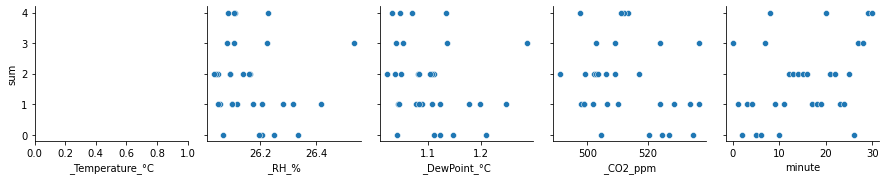

In [125]:
import seaborn as sns
sns.pairplot(merged_df, y_vars=['sum'], x_vars=['_Temperature_°C', '_RH_%', '_DewPoint_°C', '_CO2_ppm', 'minute'])

In [119]:
#correlation temperature (doesnt work in the graph above)
fig = px.scatter(merged_df, x="_Temperature_°C", y="sum")
fig.show()

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = np.array(merged_df['_Temperature_°C']).reshape(-1, 1)
y = merged_df['sum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 1.364716221639399
